In [1]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
id = '1Wun0xYnkoz6h7CzxDPUsri_lbR5eGcaf'
file = drive.CreateFile({'id':id}) 
file.GetContentFile('train.csv')

In [66]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# for ingnoring warnings
import warnings 
warnings.filterwarnings('ignore')

# 0. Load in Dataset

In [4]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.drop(['id'], axis=1, inplace=True)

In [6]:
df.shape

(381109, 11)

# 1. Data Exploration and EDA

## 1.1 Check Missing Values

In [ ]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**Since there is no missing values, we are good to go.**

## 1.2 Check Erroneous Data and EDA

In [ ]:
df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
Age,20.0,21.0,36.0,69.0,77.0,85.0
Driving_License,0.0,1.0,1.0,1.0,1.0,1.0
Region_Code,0.0,5.0,28.0,47.0,50.0,52.0
Previously_Insured,0.0,0.0,0.0,1.0,1.0,1.0
Annual_Premium,2630.0,2630.0,31669.0,55176.0,72963.0,540165.0
Policy_Sales_Channel,1.0,26.0,133.0,160.0,160.0,163.0
Vintage,10.0,24.0,154.0,285.0,297.0,299.0
Response,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
def get_col_names(df,cat_thre=10):
  '''
  Select categorical column names 
  Include those numerical columns that have less than 10 unique labels
  '''
  cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
  num_but_cat = [col for col in df.columns if df[col].nunique() < cat_thre and df[col].dtypes != "O"]
  cat_cols=cat_cols+num_but_cat
  return cat_cols

In [ ]:
cols = df.columns
cat_cols=get_col_names(df)
num_cols=list(set(cols) - set(cat_cols))

In [ ]:
cat_cols

['Gender',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Driving_License',
 'Previously_Insured',
 'Response']

In [ ]:
num_cols

['Age', 'Region_Code', 'Policy_Sales_Channel', 'Annual_Premium', 'Vintage']

- **Categorical columns:** Gender, Vehicle_Age, Vehicle_Damage,Driving_License, Previously_Insured, Response
- **Numerical columns:** Age, Region_Code, Policy_Sales_Channel, Annual_Premium, Vintage <br>
<br/>

### Next we need to perform EDA on Categorical columns and Numerical columns respectively

In [ ]:
# Get summaries of categorical variables
def cat_summary(df,col_name, plot=False):
    '''
    print the ratio of each possible label
    draw a bar graph to show the percentage of each possible label
    '''
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))
    if plot:
        sns.countplot(x=df[col_name], data=df)
        plt.show()

        Gender     Ratio
Male    206089  54.07613
Female  175020  45.92387


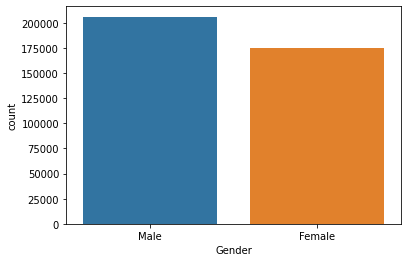

           Vehicle_Age      Ratio
1-2 Year        200316  52.561341
< 1 Year        164786  43.238549
> 2 Years        16007   4.200111


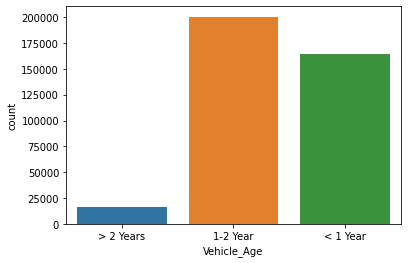

     Vehicle_Damage      Ratio
Yes          192413  50.487656
No           188696  49.512344


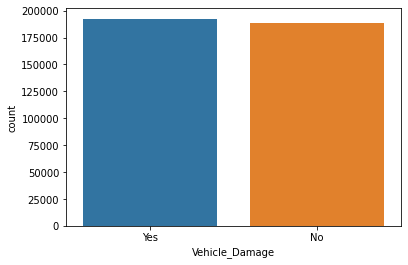

   Driving_License      Ratio
1           380297  99.786938
0              812   0.213062


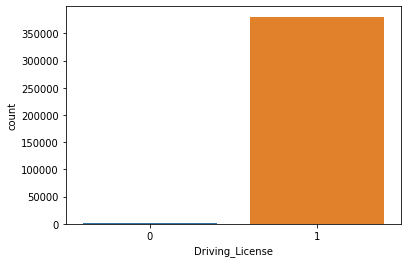

   Previously_Insured      Ratio
0              206481  54.178988
1              174628  45.821012


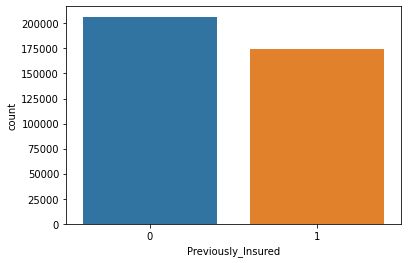

   Response      Ratio
0    334399  87.743664
1     46710  12.256336


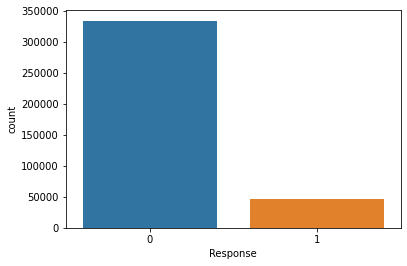

In [ ]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [ ]:
# Get summaries of numerical variables
def num_summary(df, col_name, plot1=False, plot2=False):
    '''
    draw a boxplot or histogram or both for each numerical feature
    '''
    if plot1:
      sns.boxplot(x=df[col_name])
      plt.show()
    if plot2:
        df[col_name].hist(bins=50)
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show()

    print("#####################################")

In [ ]:
num_cols

['Age', 'Region_Code', 'Policy_Sales_Channel', 'Annual_Premium', 'Vintage']

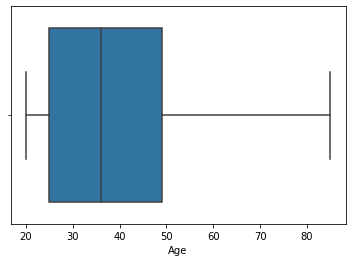

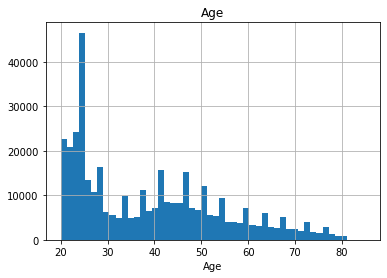

#####################################


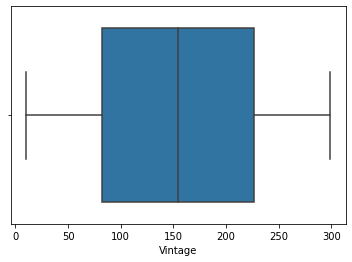

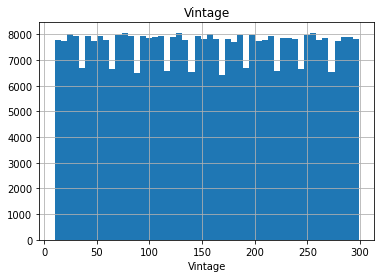

#####################################


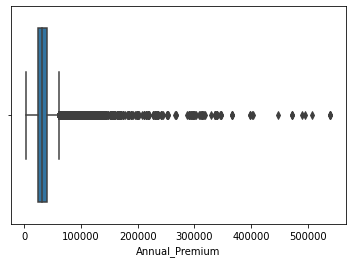

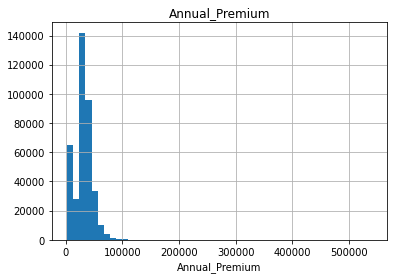

#####################################


In [ ]:
for col in ['Age', 'Vintage', 'Annual_Premium']:
    num_summary(df, col, plot1=True, plot2=True)

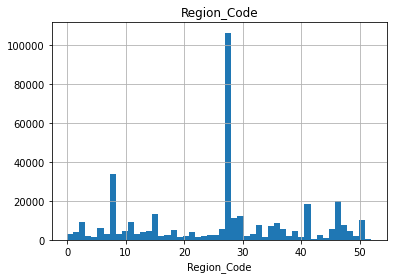

#####################################


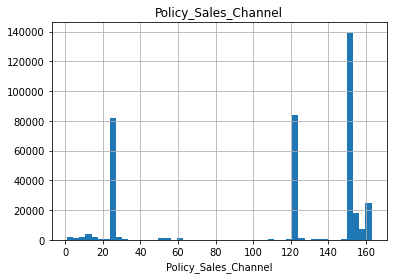

#####################################


In [ ]:
for col in ['Region_Code', 'Policy_Sales_Channel']:
    num_summary(df, col, plot2=True)

In [ ]:
def target_summary_with_num(df, target, num_col):
    '''
    print the mean of class 0 v.s. mean of clase 1
    '''
    print(df.groupby(target).agg({num_col: "mean"}), end="\n\n\n")

In [ ]:
for col in num_cols:
    target_summary_with_num(df, "Response", col)

                Age
Response           
0         38.178227
1         43.435560


          Region_Code
Response             
0           26.336544
1           26.762963


          Policy_Sales_Channel
Response                      
0                   114.851040
1                    91.869086


          Annual_Premium
Response                
0           30419.160276
1           31604.092742


             Vintage
Response            
0         154.380243
1         154.112246




In [ ]:
def target_summary_with_cat(df,target_col):
  '''
  Count the number of each possible label in class 0 v.s. the number of each possible label in class 1
  '''
  df=df.groupby([target_col,'Response'])['Annual_Premium'].count().to_frame().rename(columns={'Annual_Premium':'count'}).reset_index()
  sns.catplot(x=target_col, y="count", col="Response", data=df, kind="bar")
  plt.show()  

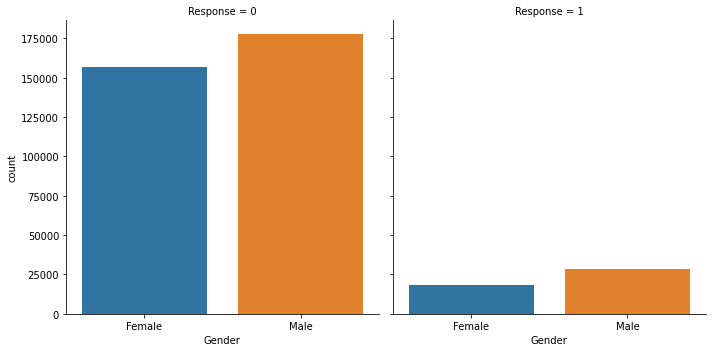

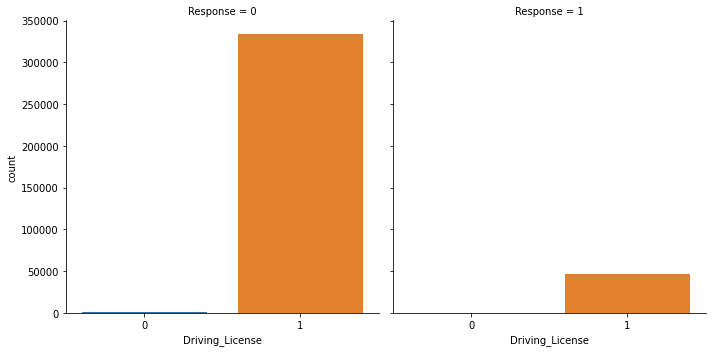

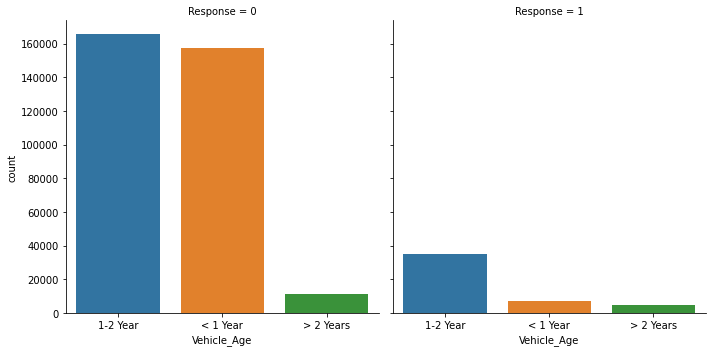

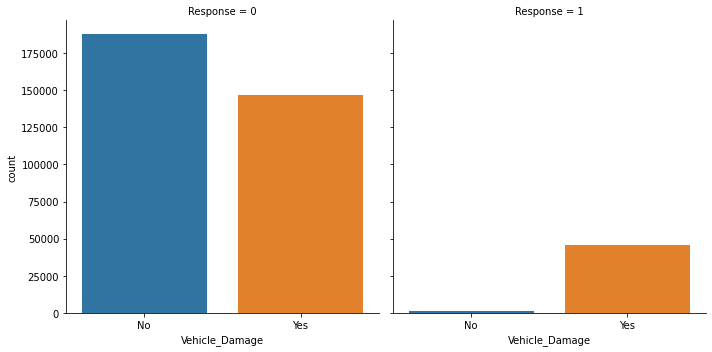

In [ ]:
for col in ['Gender','Driving_License','Vehicle_Age', 'Vehicle_Damage']:
  target_summary_with_cat(df,col)

**We observe that customers who has got his/her vehicle damaged in the past are much more likely to be interested in the vehicle insurance than customers who didn't get his/her vehicle damaged in the past.**

# 2. Data Preprocessing

## 2.1 Encode Categorical Variables

In [7]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


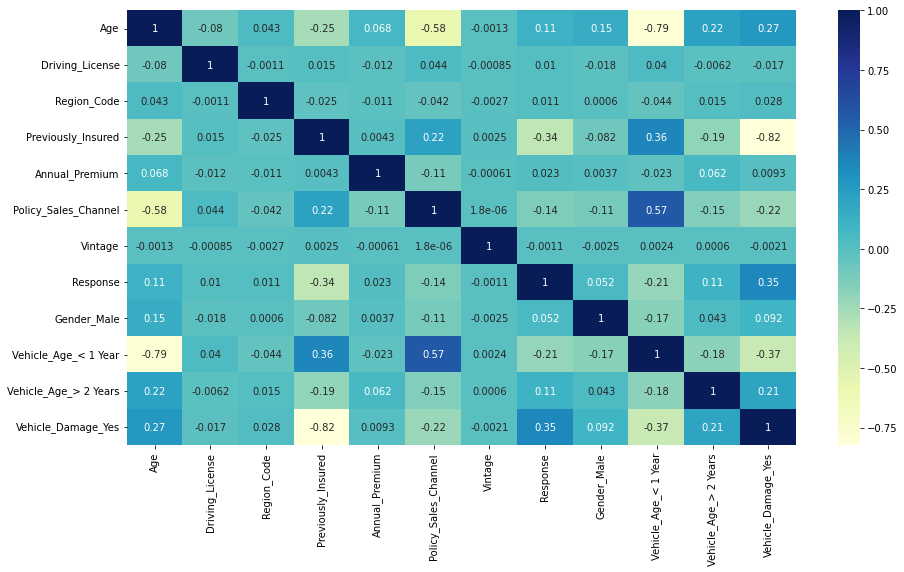

In [8]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

**According to this heatmap, Vehicle_Damage is most highly correlated to the respose.**

## 2.2 Train Test Split & Scaling

In [9]:
#change 2 column names
df=df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})

In [12]:
# sample 5000 rows from class 0 and class 1 to make a balaned dataset
df_1=df[df['Response']==1]
df_0=df[df['Response']==0]

sampled_df_1=df_1.sample(n=5000,random_state=10).reset_index(drop=True)
sampled_df_0=df_0.sample(n=5000,random_state=10).reset_index(drop=True)

sampled_df=pd.concat([sampled_df_1,sampled_df_0])
sampled_df.shape

X=sampled_df.drop(['Response'],axis=1)
y=sampled_df['Response']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10,stratify=y)

In [14]:
X_train.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Male',
       'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [15]:
X_train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
857,43,1,19.0,0,33962.0,124.0,152,1,0,0,1
4755,40,1,28.0,0,43107.0,124.0,195,0,0,0,1
3625,23,1,39.0,1,42909.0,152.0,110,1,1,0,0
2763,24,1,28.0,0,39102.0,151.0,227,1,1,0,1
891,29,1,16.0,1,36797.0,152.0,281,0,1,0,0


In [16]:
from sklearn.preprocessing import MinMaxScaler

cols_convert=['Age','Annual_Premium','Vintage']

# Convert and concatenate the 3 columns in the training and testing dataframme
minmaxALL = MinMaxScaler()
converted = minmaxALL.fit_transform(X_train[cols_convert])
converted_test=minmaxALL.transform(X_test[cols_convert])
 
res=pd.DataFrame(converted,columns=cols_convert)
X_train_z=pd.concat([res,X_train.drop(cols_convert, axis=1).reset_index(drop=True)], axis=1)
res_test=pd.DataFrame(converted_test,columns=cols_convert)
X_test_z=pd.concat([res_test,X_test.drop(cols_convert, axis=1).reset_index(drop=True)], axis=1)

In [17]:
# Convert and concatenate the 3 columns in the training and testing as a whole
minmaxALL = MinMaxScaler()
converted_all=minmaxALL.fit_transform(X[cols_convert])
res_all=pd.DataFrame(converted_all,columns=cols_convert)
X_all_z=pd.concat([res_all,X.drop(cols_convert, axis=1).reset_index(drop=True)], axis=1)

In [18]:
X_all_z.head()

,Age,Annual_Premium,Vintage,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Gender_Male,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,0.100000,0.147047,0.522491,1,41.0,0,124.0,1,1,0,1
1,0.333333,0.075802,0.498270,1,3.0,0,26.0,0,0,0,1
2,0.350000,0.000000,0.069204,1,35.0,0,124.0,1,0,0,1
3,0.566667,0.142639,0.577855,1,8.0,0,156.0,0,0,1,1
4,0.400000,0.103636,0.307958,1,16.0,0,26.0,1,0,0,1


# 3. Train the Model

## 3.1 Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=10,max_depth=10, n_estimators=200)
rf.fit(X_train_z, y_train)
rf.score(X_test_z,y_test)

0.799

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
rf_cv = RandomForestClassifier(random_state=10,max_depth=10, n_estimators=200)
scores = cross_val_score(rf_cv, X_all_z, y, scoring='accuracy', cv=cv)
print(scores)
print(np.mean(scores))

[0.7965 0.793  0.788  0.7965 0.79  ]
0.7928000000000001


In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators' : [200,500,700],
    'max_depth': [10,20,30]
}
cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
grid_rf = GridSearchCV(RandomForestClassifier(random_state=10), parameters, cv = cv, scoring='accuracy',n_jobs=-1)

start_time = time.time()
grid_rf.fit(X_all_z, y)
print("--- %s seconds ---" % (time.time() - start_time))

--- 144.5651364326477 seconds ---


In [25]:
grid_rf.best_score_

0.7928000000000001

In [26]:
grid_rf.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [69]:
best_rf_model=grid_rf.best_estimator_

## 3.2 LightGBM

In [36]:
from lightgbm import LGBMClassifier

LGBMC = LGBMClassifier(random_state=10,n_estimators=40,learning_rate = 0.1, num_leaves = 35)
LGBMC.fit(X_train_z, y_train)
LGBMC.score(X_test_z, y_test)

0.7975

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
LGBM_cv = LGBMClassifier(random_state=10,n_estimators=40,learning_rate = 0.1, num_leaves = 35)
scores = cross_val_score(LGBM_cv, X_all_z, y, scoring='accuracy', cv=cv)
print(scores)
print(np.mean(scores))

[0.801  0.793  0.7875 0.797  0.793 ]
0.7943


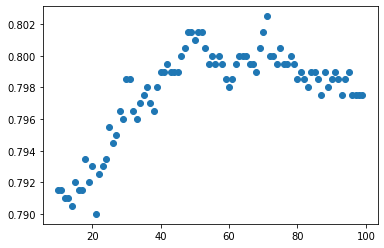

In [38]:
s = []
for i in range(10,100):
    LGBMC = LGBMClassifier(random_state=10,n_estimators=i)
    LGBMC.fit(X_train_z, y_train)
    s.append(LGBMC.score(X_test_z, y_test))

plt.scatter(x = range(10,100),y = s)
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'num_leaves' : [30,35,50,100,200],
    'learning_rate':[0.001,0.01,0.1,0.5,1,2,10],
    'n_estimators':[30,40,50,100,300,500]
    
}

cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
Grid_LGBM = GridSearchCV(LGBMClassifier(random_state=10), parameters, cv = cv,scoring='accuracy')

start_time = time.time()
Grid_LGBM.fit(X_all_z, y)
print("--- %s seconds ---" % (time.time() - start_time))

--- 374.0937385559082 seconds ---


In [40]:
Grid_LGBM.best_score_

0.7943

In [41]:
Grid_LGBM.best_params_

{'learning_rate': 0.1, 'n_estimators': 40, 'num_leaves': 35}

## 3.3 XGBoost

In [50]:
from xgboost import XGBClassifier

XGBC = XGBClassifier(random_state=10,n_estimators=10,learning_rate=0.01)
XGBC.fit(X_train_z, y_train)
XGBC.score(X_test_z, y_test)

0.796

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
XGB_cv = XGBClassifier(random_state=10,n_estimators=200,learning_rate = 0.1)
scores = cross_val_score(XGB_cv, X_all_z, y, scoring='accuracy', cv=cv)
print(scores)
print(np.mean(scores))

[0.8025 0.793  0.791  0.796  0.794 ]
0.7953


In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth' : [10,20,30],
    'learning_rate':[0.001,0.01,0.1,0.5],
    #  'n_estimators':[100,300,500]
    
}

cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
Grid_XGB = GridSearchCV(XGBClassifier(random_state=10), parameters, cv = cv, scoring='accuracy')

start_time = time.time()
Grid_XGB.fit(X_all_z, y)
print("--- %s seconds ---" % (time.time() - start_time))

--- 155.66238927841187 seconds ---


In [46]:
Grid_XGB.best_score_

0.7822

In [47]:
Grid_XGB.best_params_

{'learning_rate': 0.01, 'max_depth': 10}

## 3.4 Neural Network

In [51]:
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(hidden_layer_sizes=(100,20,10),random_state=10,max_iter=500)
MLPC.fit(X_train_z, y_train)
MLPC.score(X_test_z,y_test)

0.7815

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
scores = cross_val_score(MLPC, X_all_z, y, scoring='accuracy', cv=cv)
print(scores)
print(np.mean(scores))

[0.776  0.7805 0.7735 0.772  0.7775]
0.7759


# 4. Model Evaluation

## 4.1 Accuracy, Precision and Recall

In [58]:
from sklearn.metrics import confusion_matrix

def print_cm(y_true, y_pred):
  '''
  print accuracy, precision and recall
  '''
  cm = confusion_matrix(y_true,y_pred)
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  accuracy = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)

  print(cm)
  print()
  print('Accuracy is: ' + str(accuracy.round(2)))
  print("precision is: " + str(precision.round(2)))
  print("recall is: " + str(recall.round(2)))
  print()

In [59]:
models=[rf, LGBMC,XGBC,MLPC]
names=['Random Forest', 'LightGBM', 'XGBoost', 'Neural Network']
for model,name in zip(models,names):
  print(name+':')
  print_cm(y_test,model.predict(X_test_z))

Random Forest:
[[663 337]
 [ 65 935]]

Accuracy is: 0.8
precision is: 0.74
recall is: 0.94

LightGBM:
[[679 321]
 [ 84 916]]

Accuracy is: 0.8
precision is: 0.74
recall is: 0.92

XGBoost:
[[663 337]
 [ 71 929]]

Accuracy is: 0.8
precision is: 0.73
recall is: 0.93

Neural Network:
[[602 398]
 [ 39 961]]

Accuracy is: 0.78
precision is: 0.71
recall is: 0.96



## 4.2 ROC Curve

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_precision_recall_curve

In [60]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure()
    lw = 2
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [57]:
def draw_roc(model,x_test,y_test):
  y_prob = model.predict_proba(x_test)[:,1]
  fpr, tpr, thersholds = roc_curve(y_test, y_prob)
  roc_auc = auc(fpr, tpr)
  plot_roc_curve(fpr, tpr, roc_auc)

Random Forest:


<Figure size 432x288 with 0 Axes>

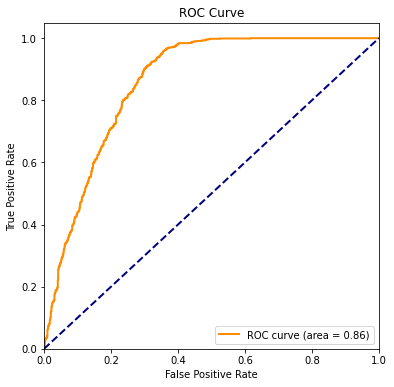

LightGBM:


<Figure size 432x288 with 0 Axes>

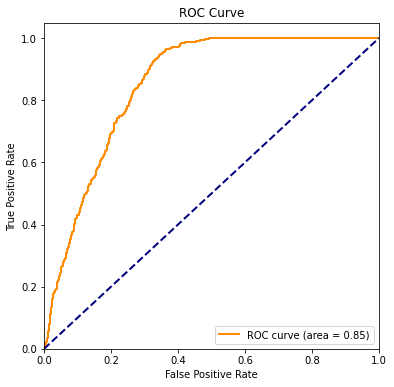

XGBoost:


<Figure size 432x288 with 0 Axes>

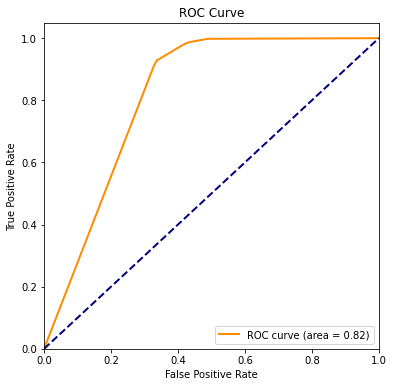

Neural Network:


<Figure size 432x288 with 0 Axes>

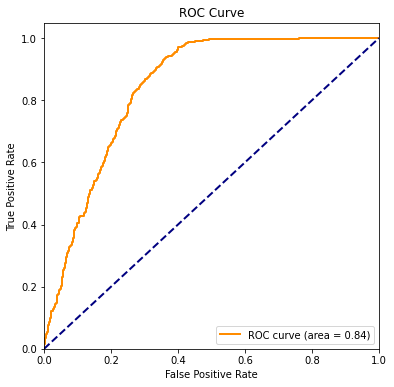

In [64]:
models=[rf, LGBMC,XGBC,MLPC]
names=['Random Forest', 'LightGBM', 'XGBoost', 'Neural Network']
for model,name in zip(models,names):
  print(name+':')
  draw_roc(model, X_test_z, y_test)

## 4.3 PR Curve

In [67]:
def draw_pr(model,x_test,y_test):
  disp = plot_precision_recall_curve(model, x_test, y_test)
  disp.ax_.set_title('Precision-Recall Curve')

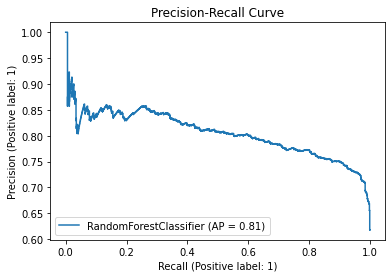

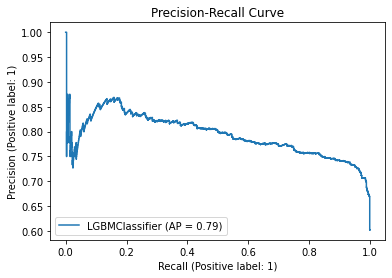

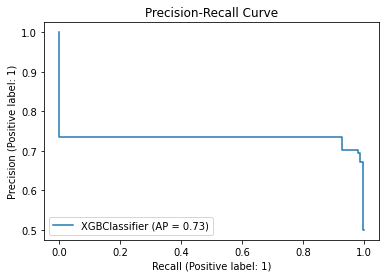

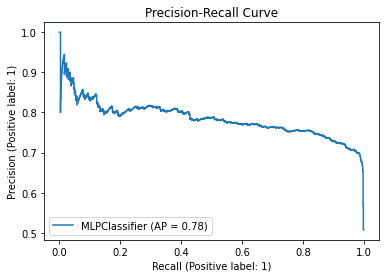

In [68]:
models=[rf, LGBMC,XGBC,MLPC]
names=['Random Forest', 'LightGBM', 'XGBoost', 'Neural Network']
for model,name in zip(models,names):
  # print(name+':')
  draw_pr(model, X_test_z, y_test)

## 4.4 Feature Importance

In [70]:
pd.DataFrame(best_rf_model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

,importance
Vehicle_Damage_Yes,0.360224
Policy_Sales_Channel,0.274224
Age,0.117357
Vintage,0.067531
Vehicle_Age_lt_1_Year,0.051881
Region_Code,0.044468
Driving_License,0.037519
Annual_Premium,0.033741
Gender_Male,0.006330
Vehicle_Age_gt_2_Years,0.005515


**According to the feature importance from the Random Forest model, Vehicle_Damage, Policy_Sales_Channel, and Age are the top 3 most importance features.**